In [2]:
pip install apimoex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import apimoex
from datetime import datetime




In [5]:
tickers = [
    'GAZP', 
    'SBER', 
    'LKOH', 
    'NLMK', 
    'POSI', 
    'TATN', 
    'ROSN', 
    'BSPB', 
    'MTSS', 
    'MGNT',
    'TCSG',
    'SBERP'
    
    ]



closing_prices = pd.DataFrame(columns=tickers)

for ticker in tickers:
    with requests.Session() as session:
        data = apimoex.get_board_candles(session, ticker, 24, '2022-01-01', '2024-12-20', ('begin', 'open', 'high', 'low', 'close', 'value'))
        data = pd.DataFrame(data)
        closing_prices[ticker] = data['close'] 

print(closing_prices)  

       GAZP    SBER    LKOH    NLMK    POSI   TATN    ROSN    BSPB    MTSS  \
0    353.73  305.47  6683.0  218.68   849.4  515.4  610.95   84.18  304.65   
1    352.55  304.24  6728.0  218.40   844.0  515.4  613.50   87.10  304.95   
2    335.00  287.01  6522.0  213.62   838.0  492.6  590.30   86.11  298.30   
3    346.13  293.92  6699.0  213.82   830.0  496.4  601.60   85.05  299.20   
4    344.00  291.69  6775.0  212.32   784.0  499.8  602.00   83.65  295.85   
..      ...     ...     ...     ...     ...    ...     ...     ...     ...   
629  136.73  295.69  6939.5  170.92  2980.4  667.5  532.25  382.07  239.85   
630  135.10  296.37  6902.5  172.98  2862.2  657.6  532.45  365.35  237.80   
631  135.00  293.30  6890.0  169.90  2879.2  650.3  521.40  366.93  230.80   
632  130.99  286.58  6727.5  163.02     NaN  646.7  503.20     NaN  225.10   
633  132.36  287.54  6736.0  164.48     NaN  650.7  505.50     NaN  226.10   

       MGNT    TCSG   SBERP  
0    5509.5  6364.4  289.74  
1  

In [6]:
# Вычисляем доходность
stock_ret = closing_prices.pct_change()
print(stock_ret.round(4)*100)

     GAZP  SBER  LKOH  NLMK  POSI  TATN  ROSN  BSPB  MTSS  MGNT  TCSG  SBERP
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN
1   -0.33 -0.40  0.67 -0.13 -0.64  0.00  0.42  3.47  0.10  1.01 -1.57  -0.25
2   -4.98 -5.66 -3.06 -2.19 -0.71 -4.42 -3.78 -1.14 -2.18 -2.98 -7.34  -4.92
3    3.32  2.41  2.71  0.09 -0.95  0.77  1.91 -1.23  0.30  2.52 -0.06   1.55
4   -0.62 -0.76  1.13 -0.70 -5.54  0.68  0.07 -1.65 -1.12 -1.12  0.49  -0.45
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
629  1.98  0.44 -0.48  1.10 -1.61  0.59  0.32 -1.30 -0.04 -1.75  0.00   0.45
630 -1.19  0.23 -0.53  1.21 -3.97 -1.48  0.04 -4.38 -0.85 -0.53  0.00   0.33
631 -0.07 -1.04 -0.18 -1.78  0.59 -1.11 -2.08  0.43 -2.94  0.50  0.00  -0.97
632 -2.97 -2.29 -2.36 -4.05  0.00 -0.55 -3.49  0.00 -2.47 -2.94  0.00  -2.44
633  1.05  0.33  0.13  0.90  0.00  0.62  0.46  0.00  0.44 -0.29  0.00   0.44

[634 rows x 12 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_30452\1471839084.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_ret = closing_prices.pct_change()


In [7]:
# Средняя и ковариация для каждой катировки
avg_returns = stock_ret.mean()
covar_matrix = stock_ret.cov()
print(avg_returns)
print(covar_matrix)

GAZP    -0.001066
SBER     0.000320
LKOH     0.000279
NLMK    -0.000150
POSI     0.002462
TATN     0.000702
ROSN     0.000087
BSPB     0.002929
MTSS    -0.000157
MGNT     0.000384
TCSG    -0.000804
SBERP    0.000353
dtype: float64
           GAZP      SBER      LKOH      NLMK      POSI      TATN      ROSN  \
GAZP   0.000920  0.000492  0.000389  0.000341  0.000218  0.000467  0.000482   
SBER   0.000492  0.000750  0.000392  0.000392  0.000238  0.000452  0.000520   
LKOH   0.000389  0.000392  0.000520  0.000298  0.000208  0.000379  0.000422   
NLMK   0.000341  0.000392  0.000298  0.000585  0.000109  0.000357  0.000380   
POSI   0.000218  0.000238  0.000208  0.000109  0.001158  0.000331  0.000377   
TATN   0.000467  0.000452  0.000379  0.000357  0.000331  0.000636  0.000532   
ROSN   0.000482  0.000520  0.000422  0.000380  0.000377  0.000532  0.000704   
BSPB   0.000217  0.000236  0.000146  0.000105  0.000223  0.000172  0.000241   
MTSS   0.000293  0.000354  0.000271  0.000297  0.000023  0

In [8]:
num_tickers = len(tickers)


num_trials = 1000000
sim_results = np.zeros((4 + num_tickers - 1, num_trials))

for i in range(num_trials):
    random_weights = np.random.random(num_tickers)
    random_weights /= np.sum(random_weights)

    portfolio_return = np.sum(avg_returns * random_weights)
    portfolio_std_dev = np.sqrt(np.dot(random_weights.T, np.dot(covar_matrix, random_weights)))

    sim_results[0, i] = portfolio_return
    sim_results[1, i] = portfolio_std_dev
    sim_results[2, i] = portfolio_return / portfolio_std_dev

    for j in range(num_tickers):
        sim_results[j + 3, i] = random_weights[j]

# Create DataFrame with the specified column names
sim_dataframe = pd.DataFrame(
    sim_results.T,
    columns=['ret', 'stdev', 'sharpe'] + tickers
)

In [9]:
sim_dataframe

,ret,stdev,sharpe,GAZP,SBER,LKOH,NLMK,POSI,TATN,ROSN,BSPB,MTSS,MGNT,TCSG,SBERP
0,0.000295,0.018991,0.015540,0.057704,0.077313,0.103599,0.093254,0.065890,0.090481,0.077281,0.032053,0.053077,0.131667,0.111039,0.106643
1,0.000453,0.018973,0.023859,0.155997,0.008344,0.016389,0.010282,0.139998,0.084757,0.068763,0.090197,0.036399,0.109892,0.169486,0.109497
2,0.000230,0.020124,0.011426,0.067060,0.091279,0.080249,0.062974,0.003532,0.145668,0.114596,0.031490,0.055075,0.152391,0.062981,0.132703
3,0.000731,0.018948,0.038592,0.076497,0.141021,0.106057,0.139736,0.164804,0.002643,0.131311,0.117667,0.065193,0.020132,0.012542,0.022397
4,0.000219,0.019898,0.010995,0.113099,0.120466,0.045281,0.035153,0.054539,0.107871,0.119696,0.025918,0.082954,0.097120,0.083879,0.114023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.000411,0.018741,0.021945,0.034045,0.099055,0.141672,0.150427,0.043776,0.065455,0.102809,0.092023,0.016042,0.091563,0.106816,0.056318
999996,0.000538,0.019255,0.027938,0.002456,0.065981,0.030372,0.162088,0.076494,0.147173,0.124285,0.074402,0.036203,0.060991,0.069439,0.150115
999997,0.000411,0.018421,0.022312,0.046433,0.104013,0.125489,0.111480,0.015409,0.106580,0.000478,0.107512,0.105053,0.131627,0.090268,0.055657
999998,0.000531,0.018533,0.028656,0.047482,0.101173,0.204413,0.075413,0.138186,0.027108,0.067086,0.050067,0.049674,0.107863,0.076258,0.055277


In [10]:
max_sharpe_ratio = sim_dataframe.iloc[sim_dataframe['sharpe'].idxmax()]

min_risk = sim_dataframe.iloc[sim_dataframe['stdev'].idxmin()]

print ("Портфель с максимальным коэффициентом шарпа :\n", max_sharpe_ratio)
print ("Портфель с минимальным риком:\n", min_risk)

Портфель с максимальным коэффициентом шарпа :
 ret       0.001633
stdev     0.020598
sharpe    0.079296
GAZP      0.020063
SBER      0.142955
LKOH      0.045635
NLMK      0.004983
POSI      0.251383
TATN      0.006768
ROSN      0.001354
BSPB      0.339770
MTSS      0.050086
MGNT      0.004030
TCSG      0.054178
SBERP     0.078796
Name: 737472, dtype: float64
Портфель с минимальным риком:
 ret       0.000549
stdev     0.017092
sharpe    0.032094
GAZP      0.002573
SBER      0.003167
LKOH      0.134600
NLMK      0.169608
POSI      0.131317
TATN      0.008104
ROSN      0.007318
BSPB      0.092611
MTSS      0.191822
MGNT      0.106311
TCSG      0.110152
SBERP     0.042417
Name: 355801, dtype: float64


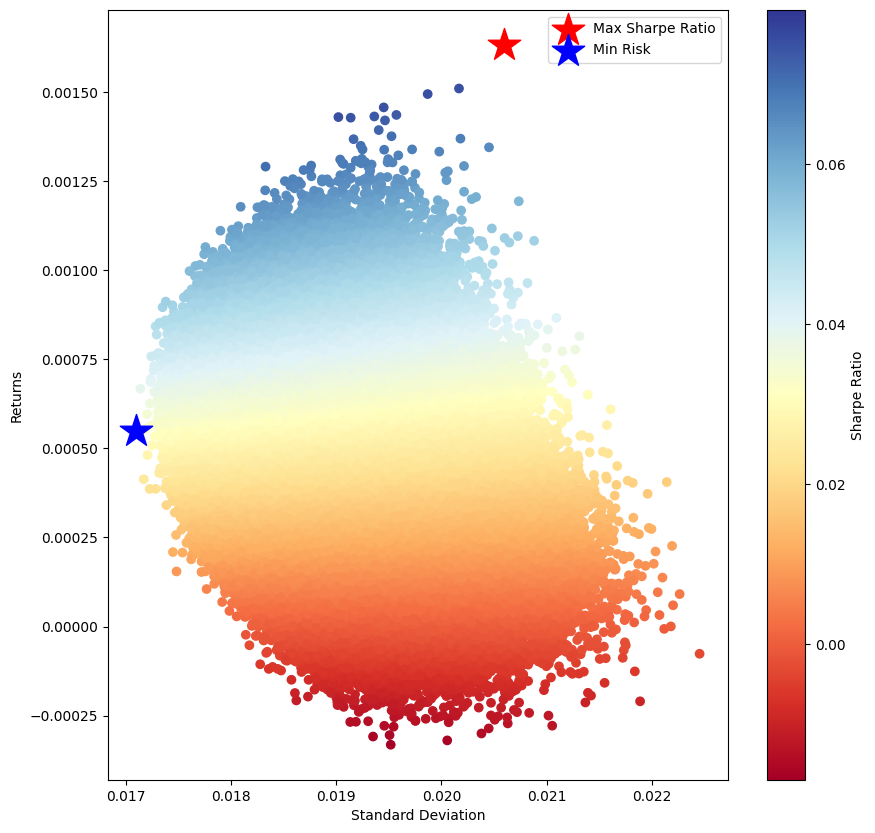

In [11]:
max_sharpe_ratio_idx = sim_dataframe['sharpe'].idxmax()
min_risk_idx = sim_dataframe['stdev'].idxmin()

max_sharpe_ratio = sim_dataframe.iloc[max_sharpe_ratio_idx][['ret', 'stdev']]
min_risk = sim_dataframe.iloc[min_risk_idx][['ret', 'stdev']]

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(sim_dataframe['stdev'], sim_dataframe['ret'], c=sim_dataframe['sharpe'], cmap='RdYlBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

plt.scatter(max_sharpe_ratio['stdev'], max_sharpe_ratio['ret'], marker='*', color='r', s=600, label='Max Sharpe Ratio')
plt.scatter(min_risk['stdev'], min_risk['ret'], marker='*', color='b', s=600, label='Min Risk')

plt.legend()
plt.show()


In [12]:
max_sharpe_ratio = sim_dataframe.iloc[sim_dataframe['sharpe'].idxmax()]
max_sharpe_ratio

ret       0.001633
stdev     0.020598
sharpe    0.079296
GAZP      0.020063
SBER      0.142955
LKOH      0.045635
NLMK      0.004983
POSI      0.251383
TATN      0.006768
ROSN      0.001354
BSPB      0.339770
MTSS      0.050086
MGNT      0.004030
TCSG      0.054178
SBERP     0.078796
Name: 737472, dtype: float64

In [13]:
min_risk = sim_dataframe.iloc[sim_dataframe['stdev'].idxmin()]
min_risk

ret       0.000549
stdev     0.017092
sharpe    0.032094
GAZP      0.002573
SBER      0.003167
LKOH      0.134600
NLMK      0.169608
POSI      0.131317
TATN      0.008104
ROSN      0.007318
BSPB      0.092611
MTSS      0.191822
MGNT      0.106311
TCSG      0.110152
SBERP     0.042417
Name: 355801, dtype: float64

In [14]:
import math
prices = closing_prices.iloc[-3]
print(prices)

total_investment = 100000
weights = max_sharpe_ratio[3:]

investments_max_sharpe = {}
sum_bucks = {}
total_spent = 0

for ticker, weight in weights.items():
    price = prices[ticker]
    if pd.notna(price) and price > 0:  # проверяем, что цена валидная и больше нуля
        investment = math.floor((total_investment * weight) / price)
        investment_value = investment * price
        sum_bucks[ticker] = investment_value
        investments_max_sharpe[ticker] = investment
        total_spent += investment_value
    else:
        sum_bucks[ticker] = 0
        investments_max_sharpe[ticker] = 0

remaining_balance = total_investment - total_spent

print("Распределение средств для максимального коэффициента Шарпа:")
print(f"Тикер   количество акций   суммарная стоимость")
for ticker, investment in investments_max_sharpe.items():
    print(f"{ticker}: {investment}, {sum_bucks[ticker]:.2f} руб.")

print(f"Оставшийся баланс: {remaining_balance:.2f} рублей")

GAZP      135.00
SBER      293.30
LKOH     6890.00
NLMK      169.90
POSI     2879.20
TATN      650.30
ROSN      521.40
BSPB      366.93
MTSS      230.80
MGNT     5932.00
TCSG         NaN
SBERP     293.39
Name: 631, dtype: float64
Распределение средств для максимального коэффициента Шарпа:
Тикер   количество акций   суммарная стоимость
GAZP: 14, 1890.00 руб.
SBER: 48, 14078.40 руб.
LKOH: 0, 0.00 руб.
NLMK: 2, 339.80 руб.
POSI: 8, 23033.60 руб.
TATN: 1, 650.30 руб.
ROSN: 0, 0.00 руб.
BSPB: 92, 33757.56 руб.
MTSS: 21, 4846.80 руб.
MGNT: 0, 0.00 руб.
TCSG: 0, 0.00 руб.
SBERP: 26, 7628.14 руб.
Оставшийся баланс: 13775.40 рублей
